# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [135]:
import pandas as pd
import numpy as np

In [136]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_04/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ix264-00001-00006,"['--disable-gpl', '--disable-thread', '--bit-d...",69.7144,0.0000,0.0008,2879792
1,ix264-00001-00015,"['--disable-asm', '--disable-thread', '--bit-d...",35.8783,0.0000,0.0010,2271288
2,ix264-00001-00012,"['--disable-thread', '--disable-win32thread', ...",68.0758,0.0007,0.0002,2825856
3,ix264-00001-00014,"['--disable-asm', '--disable-gpl', '--disable-...",19.4958,0.0009,0.0000,1554512
4,ix264-00001-00005,"['--disable-gpl', '--disable-thread', '--bit-d...",73.4773,0.0000,0.0010,3094224
...,...,...,...,...,...,...
375,ix264-00020-00016,"['--bit-depth=all', '--chroma-format=all', '--...",82.5890,0.0001,0.0008,3108808
376,ix264-00020-00013,"['--disable-gpl', '--disable-thread', '--disab...",44.8702,0.0002,0.0007,1879304
377,ix264-00020-00018,"['--disable-asm', '--disable-interlaced', '--b...",22.8357,0.0009,0.0000,1539400
378,ix264-00020-00003,"['--disable-asm', '--disable-thread', '--disab...",22.7199,0.0000,0.0010,1554512


In [137]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,ix264-00012-00001,48.7404,1938928
00001,00004,ix264-00004-00001,41.5768,1938928
00001,00002,ix264-00002-00001,41.1681,1938928
00001,00005,ix264-00005-00001,40.7662,1938928
00001,00006,ix264-00006-00001,40.8644,1938928
...,...,...,...,...
00020,00005,ix264-00005-00020,33.9106,1720304
00020,00003,ix264-00003-00020,44.4579,1720304
00020,00019,ix264-00019-00020,34.2627,1720304


In [138]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  41.1681  50.1681  41.5768  40.7662  40.8644  41.3782   
00002    19.5403      NaN  20.1615  20.2753  20.1672  20.1646  20.2712   
00003    19.3717  23.9486      NaN  20.1044  19.9548  20.0014  20.7528   
00004    32.9775  34.1190  42.9914      NaN  33.7845  33.7844  33.8405   
00005    73.4773  77.1811  93.2643  80.7439      NaN  75.1896  75.3592   
00006    69.7144  69.7888  86.3344  73.5969  71.0795      NaN  70.5340   
00007    18.9078  19.4931  23.1826  19.6303  19.3302  19.4396      NaN   
00008    36.2325  37.4707  44.5545  37.6195  37.0250  37.0968  37.4929   
00009    42.2148  43.2720  52.8646  43.8096  43.2238  43.2793  43.1932   
00010    36.1599  37.9711  45.1824  37.9347  37.3734  37.0351  37.2366   
00011    36.2713  38.0474  45.4290  38.0368  37.6042  37.6419  37.6272   
00012    68.0758  67.4520  83.9360  71.5778  69.3900  69.0739  69.3058   
00013    38.5303  46.7041  40.0179  39.2125  38.7712  39.1574  39.2574   
00014    19.4958  20.0891  24.6068  20.4632  19.9263  19.9811  20.1236   
00015    35.8783  35.9240  44.0294  38.5011  36.8204  36.7443  37.0455   
00016    74.1111  84.6242  82.4153  76.5721  76.3304  76.7400  76.2805   
00017    39.1262  37.3742  47.5006  37.7332  37.1913  37.3032  37.3181   
00018    19.4556  25.4599  20.3484  20.2507  20.2363  20.1947  20.1536   
00019    40.1294  41.1362  49.5573  41.6646  41.6056  41.3626  41.5827   
00020    33.0091  34.4574  44.4579  34.6098  33.9106  34.0706  33.7555   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  43.2814  48.5109  41.3771  45.4949  48.7404  45.8049  43.1335  45.5828   
00002  21.6308  20.5379  21.9961  20.8131  20.6276  21.9731  19.9605  20.4155   
00003  20.4286  20.5095  21.4369  21.6519  22.4682  21.5422  20.4376  20.9266   
00004  35.8238  39.3348  34.3402  35.7198  39.7016  33.7000  37.1036  40.6831   
00005  81.0714  80.9722  76.0657  76.7394  91.4533  75.4295  75.3730  82.6655   
00006  71.1454  73.6507  71.7384  76.4547  71.3708  72.5745  74.1721  71.5102   
00007  20.4098  23.2554  19.9046  20.9294  22.8003  19.1614  20.2237  21.6059   
00008      NaN  41.3254  37.7902  39.9995  44.7586  36.9633  40.6626  45.4064   
00009  44.3612      NaN  43.6894  45.4928  52.1386  43.9420  45.9679  52.4932   
00010  39.7328  37.8987      NaN  39.6361  44.3847  36.7903  38.2019  43.0263   
00011  38.6503  44.1572  39.4748      NaN  43.2765  40.9892  39.8849  44.4623   
00012  75.3558  75.4403  71.1878  76.7081      NaN  70.2936  71.2604  74.5531   
00013  39.6499  40.9306  42.6819  41.2143  45.5399      NaN  41.6222  43.0691   
00014  21.3791  20.4845  20.2965  21.2609  23.5491  19.7602      NaN  21.0650   
00015  40.0791  38.5771  37.4085  40.7697  38.2959  38.2434  38.2992      NaN   
00016  77.3616  86.7933  82.7269  81.3163  89.4190  84.5591  81.1125  85.2102   
00017  39.3877  42.2145  37.9331  40.6946  43.4775  37.0402  41.5423  42.7122   
00018  20.6514  21.5003  21.3677  20.9439  23.9205  21.7850  21.0235  21.8137   
00019  44.1165  48.2177  41.4546  43.2762  48.9881  42.3964  43.5862  47.3413   
00020  35.2506  34.3427  34.5688  36.1735  40.5946  33.5645  33.8789  36.5817   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  40.5242  45.4870  48.2043  41.0169  41.9726  
00002  20.3256  23.1838  22.8156  20.2445  22.2461  
00003  19.7330  21.9463  23.1000  19.7140  22.7199  
00004  37.6625  39.5241  36.5803  33.9171  33.8644  
00005  80.5470  82.4082  80.0427  76.8584  75.6369  
00006  76.0821 

In [139]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00016)"
00002,"(Build Time, 00001)"
00003,"(Build Time, 00001)"
00004,"(Build Time, 00001)"
00005,"(Build Time, 00001)"
00006,"(Build Time, 00001)"
00007,"(Build Time, 00001)"
00008,"(Build Time, 00001)"


In [140]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0   
00002   1488112.0        NaN  1488112.0  1488112.0  1488112.0  1488112.0   
00003   1554512.0  1554512.0        NaN  1554512.0  1554512.0  1554512.0   
00004   1720304.0  1720304.0  1720304.0        NaN  1720304.0  1720304.0   
00005   3094224.0  3094224.0  3094224.0  3094224.0        NaN  3094224.0   
00006   2879792.0  2879792.0  2879792.0  2879792.0  2879792.0        NaN   
00007   1440352.0  1440352.0  1440352.0  1440352.0  1440352.0  1440352.0   
00008   1866608.0  1866608.0  1866608.0  1866608.0  1866608.0  1866608.0   
00009   2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00010   2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00011   2285496.0  2285496.0  2285496.0  2285496.0  2285496.0  2285496.0   
00012   2825856.0  2825856.0  2825856.0  2825856.0  2825856.0  2825856.0   
00013   1879304.0  1879304.0  1879304.0  1879304.0  1879304.0  1879304.0   
00014   1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00015   2271288.0  2271288.0  2271288.0  2271288.0  2271288.0  2271288.0   
00016   3108808.0  3108808.0  3108808.0  3108808.0  3108808.0  3108808.0   
00017   2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00018   1539400.0  1539400.0  1539400.0  1539400.0  1539400.0  1539400.0   
00019   1942672.0  1942672.0  1942672.0  1942672.0  1942672.0  1942672.0   
00020   1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0   
00002  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0   
00003  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00004  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   
00005  3094224.0  3094224.0  3094224.0  3094224.0  3094224.0  3094224.0   
00006  2879792.0  2879792.0  2879792.0  2879792.0  2879792.0  2879792.0   
00007        NaN  1440352.0  1440352.0  1440352.0  1440352.0  1440352.0   
00008  1866608.0        NaN  1866608.0  1866608.0  1866608.0  1866608.0   
00009  2046072.0  2046072.0        NaN  2046072.0  2046072.0  2046072.0   
00010  2278824.0  2278824.0  2278824.0        NaN  2278824.0  2278824.0   
00011  2285496.0  2285496.0  2285496.0  2285496.0        NaN  2285496.0   
00012  2825856.0  2825856.0  2825856.0  2825856.0  2825856.0        NaN   
00013  1879304.0  1879304.0  1879304.0  1879304.0  1879304.0  1879304.0   
00014  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00015  2271288.0  2271288.0  2271288.0  2271288.0  2271288.0  2271288.0   
00016  3108808.0  3108808.0  3108808.0  3108808.0  3108808.0  3108808.0   
00017  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00018  1539400.0  1539400.0  1539400.0  1539400.0  1539400.0  1539400.0   
00019  1942672.0  1942672.0  1942672.0  1942672.0  1942672.0  1942672.0   
00020  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0   
00002  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0   
00003  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00004  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   
00005 

In [141]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,50.1681,43.950142,40.5242
00002,23.1838,20.913174,19.5403
00003,23.9486,21.092021,19.3717
00004,42.9914,36.286979,32.9775
00005,93.2643,79.498874,73.4773
00006,86.3344,73.385137,69.7144
00007,23.2554,20.479663,18.9078
00008,45.4064,39.554453,36.2325


In [142]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00016,89.4190,81.111211,74.1111
00005,93.2643,79.498874,73.4773
00006,86.3344,73.385137,69.7144
00012,83.9360,72.518742,67.4520
00009,52.8646,46.005437,42.2148
00001,50.1681,43.950142,40.5242
00019,50.0098,43.997321,40.1294
00013,46.7041,41.501300,38.5303


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

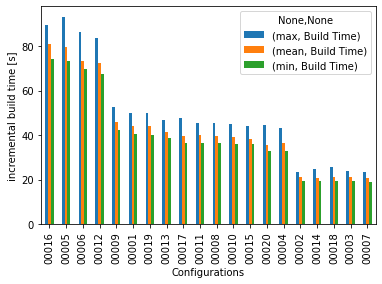

In [143]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

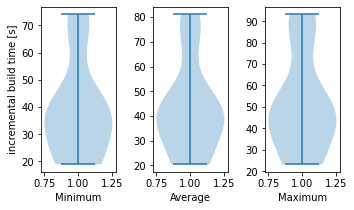

In [144]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()